In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        49.5604 (44.9253, 55.5488) (44.5508, 54.9509) 10.4001 (Jnode 202)\n',
 't_n104        31.6728 (28.6649, 33.9904) (28.7559, 34.0756)  5.3197 (Jnode 201)\n',
 't_n105        30.7552 (27.8345, 33.0245) (27.8891, 33.0716)  5.1825 (Jnode 200)\n',
 't_n106        27.7534 (25.1007, 29.9608) (25.2066, 30.0614)  4.8548 (Jnode 199)\n',
 't_n107        27.0102 (24.4211, 29.2034) (24.4976, 29.2654)  4.7678 (Jnode 198)\n',
 't_n108        25.5523 (23.0769, 27.7241) (23.1188, 27.7639)  4.6451 (Jnode 197)\n',
 't_n109        12.3377 (11.1466, 14.1796) (11.0264, 13.9691)  2.9427 (Jnode 196)\n',
 't_n110        12.2329 (11.0563, 14.0660) (10.9183, 13.8364)  2.9180 (Jnode 195)\n',
 't_n111        11.8913 (10.7606, 13.6649) (10.6330, 13.4539)  2.8209 (Jnode 194)\n',
 't_n112        11.4721 (10.3880, 13.1877) (10.2533, 12.9681)  2.7148 (Jnode 193)\n',
 't_n113        10.9071 ( 9.9022, 12.5324) ( 9.7737, 12.3309)  2.5572 (Jnode 192)\n',
 't_n114         7.3418 ( 6.5050,  8.5235) ( 6.4113,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[49.5604,
 31.6728,
 30.7552,
 27.7534,
 27.0102,
 25.5523,
 12.3377,
 12.2329,
 11.8913,
 11.4721,
 10.9071,
 7.3418,
 4.3466,
 2.5431,
 1.9928,
 8.2046,
 7.036,
 11.3909,
 7.217,
 10.9396,
 8.735,
 7.0998,
 5.8611,
 10.6306,
 10.0253,
 2.6522,
 11.76,
 10.6604,
 8.2572,
 6.619,
 7.3119,
 6.6544,
 5.5668,
 5.3393,
 23.9553,
 19.2978,
 25.8587,
 23.8176,
 22.3064,
 18.638,
 10.01,
 17.9746,
 15.8338,
 14.0885,
 12.0322,
 21.6819,
 20.0264,
 5.1175,
 2.2756,
 29.0969,
 27.5488,
 25.1059,
 24.2838,
 26.0869,
 18.105,
 21.8787,
 17.667,
 30.7994,
 29.0327,
 26.544,
 25.174,
 21.5255,
 14.3018,
 19.1872,
 26.1547,
 8.2811,
 26.3723,
 35.9681,
 35.0987,
 34.4036,
 32.8204,
 30.3437,
 29.0214,
 28.0074,
 26.8047,
 23.9443,
 20.8474,
 17.5003,
 24.3098,
 22.9492,
 18.3672,
 20.7453,
 26.3093,
 24.2519,
 22.3996,
 19.1047,
 12.987,
 24.8324,
 22.2895,
 19.7,
 28.9437,
 27.5273,
 26.1699,
 23.248,
 17.2444,
 25.9477,
 17.6493,
 14.3469,
 5.7076,
 34.878,
 30.1894]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[49.0211,
 31.8307,
 30.2038,
 27.1835,
 26.1592,
 23.9185,
 12.8035,
 12.6224,
 11.954,
 11.2663,
 10.5596,
 7.0599,
 4.3383,
 2.5679,
 2.1098,
 8.0241,
 6.5728,
 11.258,
 6.9977,
 10.6385,
 8.3452,
 6.6279,
 6.0909,
 10.5602,
 9.7485,
 3.1839,
 11.8808,
 10.5204,
 8.1332,
 6.4409,
 7.2932,
 6.4081,
 5.1779,
 5.8655,
 22.0861,
 18.1872,
 24.628,
 22.2969,
 20.2925,
 16.7365,
 9.5731,
 16.5344,
 14.0682,
 12.1552,
 10.0396,
 20.2137,
 18.2887,
 5.7941,
 2.7009,
 27.2853,
 24.8737,
 21.6035,
 21.1727,
 23.6321,
 16.0303,
 19.475,
 14.8653,
 30.6757,
 28.4865,
 25.4192,
 23.3829,
 19.9235,
 14.147,
 17.1848,
 24.8411,
 9.8978,
 25.1842,
 38.5636,
 36.6879,
 34.9799,
 32.8519,
 29.663,
 27.8418,
 26.2356,
 24.2581,
 20.9313,
 17.6238,
 14.5305,
 21.4603,
 19.8218,
 15.5329,
 16.942,
 24.1631,
 21.6784,
 19.3516,
 16.3308,
 11.4153,
 21.9485,
 19.4073,
 16.6048,
 27.2398,
 24.9567,
 22.6203,
 19.2594,
 13.32,
 23.3913,
 17.2859,
 13.3701,
 5.5288,
 37.1413,
 31.6772]

In [12]:
posterior_mean_iqtree

[49.5604,
 31.6728,
 30.7552,
 27.7534,
 27.0102,
 25.5523,
 12.3377,
 12.2329,
 11.8913,
 11.4721,
 10.9071,
 7.3418,
 4.3466,
 2.5431,
 1.9928,
 8.2046,
 7.036,
 11.3909,
 7.217,
 10.9396,
 8.735,
 7.0998,
 5.8611,
 10.6306,
 10.0253,
 2.6522,
 11.76,
 10.6604,
 8.2572,
 6.619,
 7.3119,
 6.6544,
 5.5668,
 5.3393,
 23.9553,
 19.2978,
 25.8587,
 23.8176,
 22.3064,
 18.638,
 10.01,
 17.9746,
 15.8338,
 14.0885,
 12.0322,
 21.6819,
 20.0264,
 5.1175,
 2.2756,
 29.0969,
 27.5488,
 25.1059,
 24.2838,
 26.0869,
 18.105,
 21.8787,
 17.667,
 30.7994,
 29.0327,
 26.544,
 25.174,
 21.5255,
 14.3018,
 19.1872,
 26.1547,
 8.2811,
 26.3723,
 35.9681,
 35.0987,
 34.4036,
 32.8204,
 30.3437,
 29.0214,
 28.0074,
 26.8047,
 23.9443,
 20.8474,
 17.5003,
 24.3098,
 22.9492,
 18.3672,
 20.7453,
 26.3093,
 24.2519,
 22.3996,
 19.1047,
 12.987,
 24.8324,
 22.2895,
 19.7,
 28.9437,
 27.5273,
 26.1699,
 23.248,
 17.2444,
 25.9477,
 17.6493,
 14.3469,
 5.7076,
 34.878,
 30.1894]

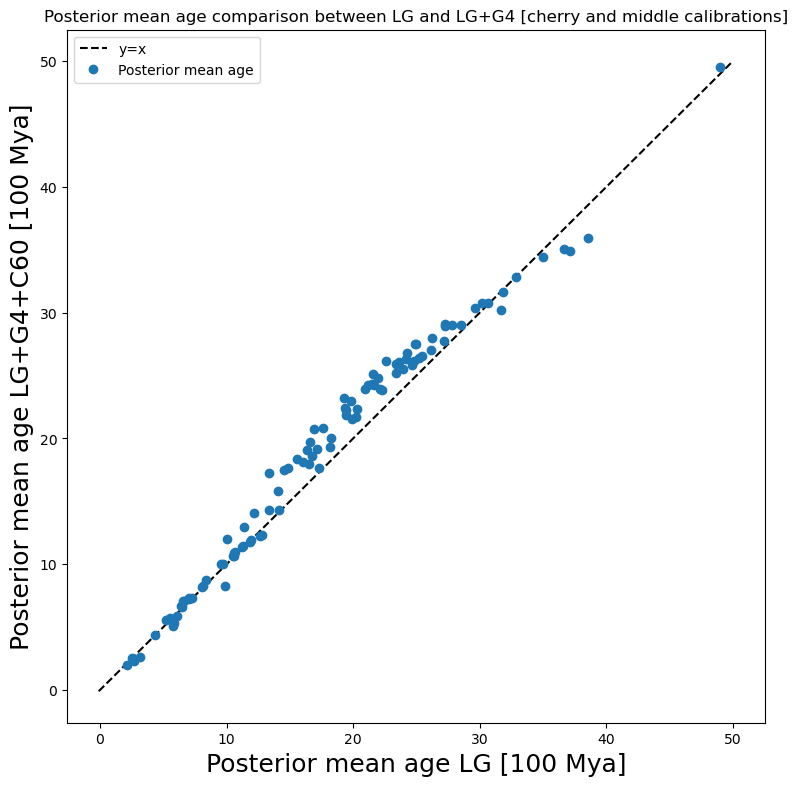

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_cm_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')